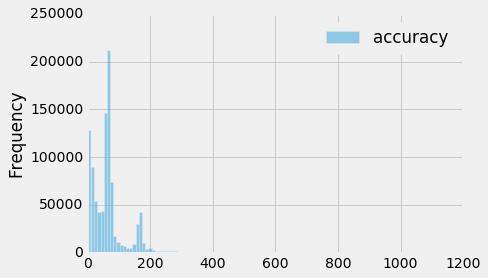

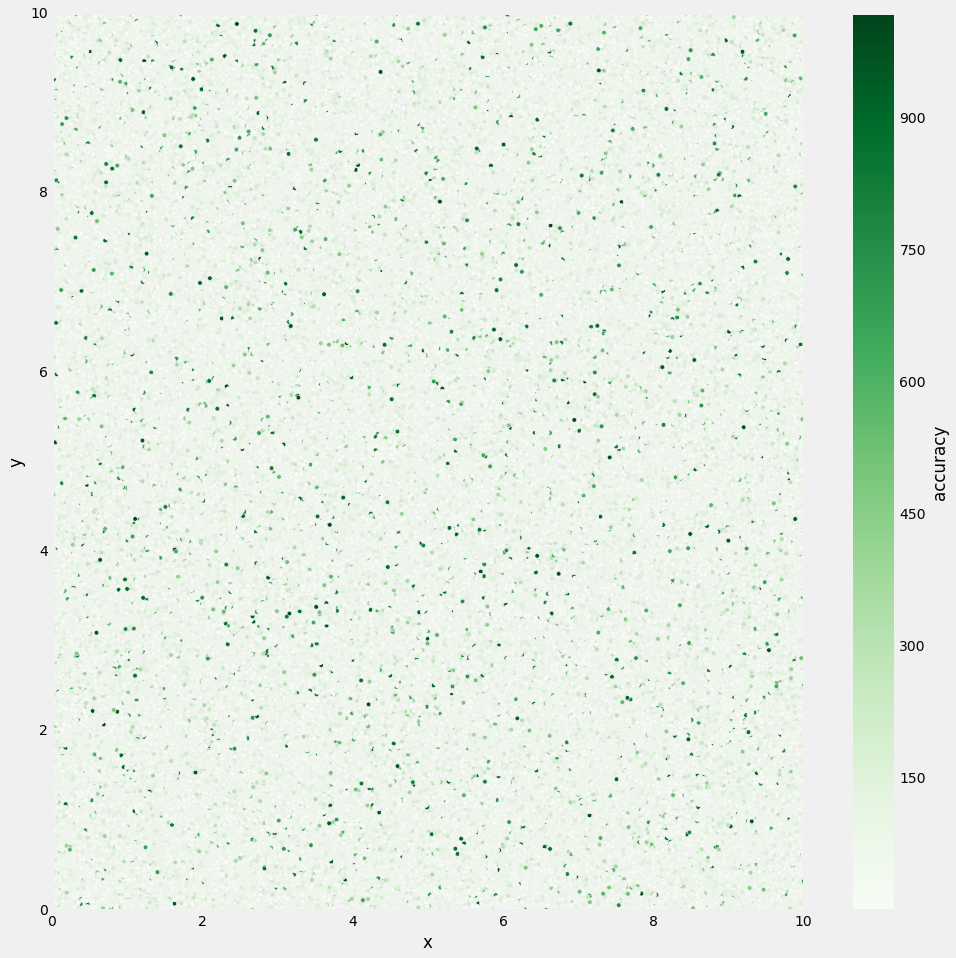

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import cm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('./data/facebook-v/train_sample_1M.csv')
df[['accuracy']].plot.hist(bins=100, alpha=0.5)
df.plot.scatter(x='x', y='y', c='accuracy', colormap='Greens', figsize=(15, 15), xlim=(0, 10), ylim=(0, 10))

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

data = df[df['accuracy'] > 300][['x', 'y']]
label = df[df['accuracy'] > 300][['place_id']]

skf = StratifiedKFold(n_splits=4)
train_index, test_index = next(iter(skf.split(data, label)))
X_train = data[train_index]
y_train = label[train_index]
X_test = data[test_index]
y_test = label[test_index]


n_class = len(np.unique(y_train))
print n_class

estimator = GaussianMixture(
    n_components=n_class, 
    covariance_type='full', 
    max_iter=20, 
    random_state=0
)
estimator.fit(X_train)
print estimator.bic(X_test)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


IndexError: too many indices for array